In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

os.chdir('C:\\Users\\HP\\Desktop\\ML Course Content\\Part 2 - Regression\\Section 7 - Support Vector Regression (SVR)') # to change file working directory


In [36]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values # to convert all columns but dependent column to matrix to represent independent variables
y = dataset.iloc[:, 2].values

In [37]:
# feature scaling since SVR model doesnt do it
from sklearn.preprocessing import StandardScaler

In [38]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [39]:
X = sc_X.fit_transform(X)

In [40]:
y = np.array(y).reshape(-1,1) #to reshape the array to 2D
y = sc_y.fit_transform(y)

In [41]:
#fitting the SVR model
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [42]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [43]:
y_pred

array([170370.0204065])

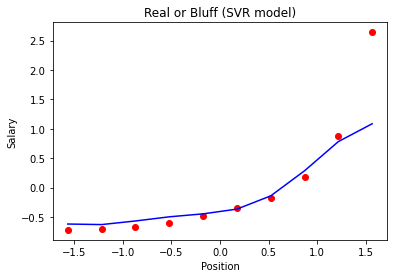

In [44]:
# Visualizing the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Real or Bluff (SVR model)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()


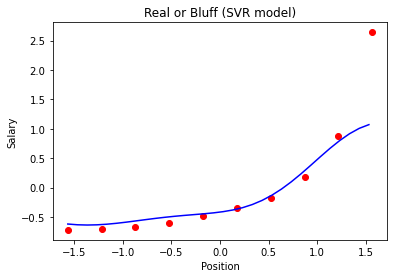

In [45]:
# Visualizing the SVR results for higher resolution
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Real or Bluff (SVR model)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()